In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Synthesize data
Synthetic data will be built using y = 2x + 3

In [2]:
def synthetic_data(x1, x2, num_examples):
    #np.random.normal is used to generate normalized distributed data(bell curve). 
    X = np.random.normal(0, 1, (num_examples, len(x1))) #0 is centre. 1 is std(+-1). num_examples * len(x1) is shape of output ndarray.
    y = np.dot(X, x1) + x2 #dot product of arrays using np.dot and adding x2 to the output array. 
    y += np.random.normal(0, 1, y.shape)  #Adding noise to generalize data
    return X, y.reshape((-1, 1)) #y is single feature. so reshaping it to a single column

In [3]:
x,y = synthetic_data(np.array([2]), 3, 1000) 
#x is ndarray of shape 1000*1 having mean=0 and std=1 
#y is same shape   

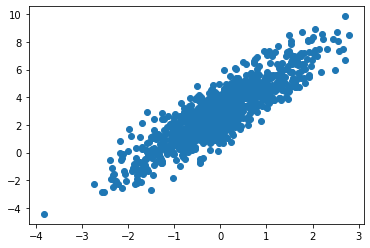

In [4]:
plt.scatter(x,y)

## Initialize random x1 and x2 for your line

In [5]:
x1_init = np.random.random(x.shape[1]) #Initial value of theta0 
x2_init = np.random.random(x.shape[1]) #Initial value of theta1
#generates random number of shape x.shape[1] which is 1

In [6]:
print(x1_init, x2_init)

[0.70159049] [0.09531191]


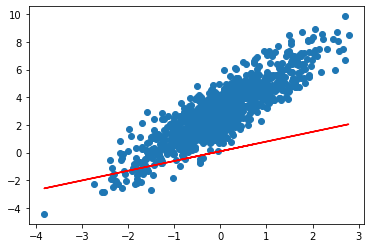

In [7]:
plt.figure()
plt.scatter(x,y) #blue color scatter plot
plt.plot(x, x1_init*x+x2_init, 'r') #red line for each x it will calculate y accordingly and plot
plt.show()

## Loss Function
We will use the mean squared error as Loss function

In [8]:
def mse(x1, x2, scatter_x, scatter_y):
  n = len(scatter_x) #1000
  J = sum([(scatter_x[i]*x1 + x2 - scatter_y[i])**2 for i in range(n)]) 
  #sum of square of difference between predicted/calculated value of y(mx+c) and true value of y(2x+3)
  return J/n

In [9]:
mse(x1_init, x2_init, x,y)

array([10.48168655])

## Visualizing the loss function

In [10]:
def plot_mse(scatter_x, scatter_y):
  x1 = np.random.normal(0, 7, (2000,1))
  x2 = np.random.normal(0, 7, (2000,1))
  mse_wrt_x1 = [mse(i,x2[0],scatter_x,scatter_y) for i in x1]
  mse_wrt_x2 = [mse(x1[0],i,scatter_x,scatter_y) for i in x2]
  _, ax = plt.subplots(1,2,figsize=(20,10))

  ax[0].plot(x1, mse_wrt_x1)
  ax[0].set_title("mse x1")

  ax[1].plot(x2, mse_wrt_x2)
  ax[1].set_title("mse x2")

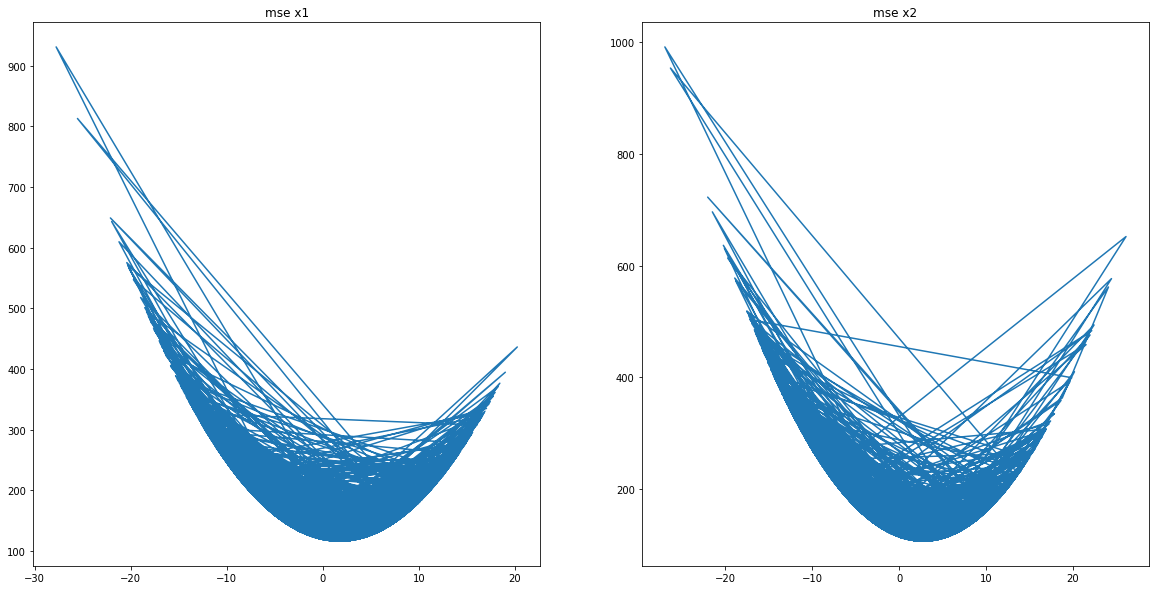

In [11]:
plot_mse(x,y)

x1 minima will be at 2<br>
x2 minima will be at 3<br>
At minima, point of convergence i.e. cost function is minimum

## Optimizer and training

In [12]:
def gradient_descent(lr, scatter_x, scatter_y, x1, x2, epochs):
  J_list = [] #to store losses at each epoch
  n = len(scatter_x)  #1000
  line_list = [] #storing x1 and x2 values after each epoch

  for i in range(epochs+1):
    if i%50 == 0:
      print("epoch:", i)

    loss = mse(x1, x2, scatter_x, scatter_y)
    J_list.append(loss)
    if i%50 ==0:
      print("mse:", loss)

    dx1 = 2/n*(sum([(scatter_x[i]*x1 + x2 - scatter_y[i])*scatter_x[i] for i in range(n)]))
    dx2 = 2/n*(sum([(scatter_x[i]*x1 + x2 - scatter_y[i]) for i in range(n)]))

    x1 = x1 - lr*dx1
    x2 = x2 - lr*dx2
    #minimizing error using derivative
    line_list.append((x1,x2))
    if i%50 == 0:
      print()

  return x1, x2, line_list, J_list


In [13]:
predicted_x1, predicted_x2, line_list, J_list =  gradient_descent(0.01, x,y,x1_init, x2_init, 500)

epoch: 0
mse: [10.48168655]

epoch: 50
mse: [2.33652265]

epoch: 100
mse: [1.20960162]

epoch: 150
mse: [1.05293527]

epoch: 200
mse: [1.03104647]

epoch: 250
mse: [1.02797259]

epoch: 300
mse: [1.02753867]

epoch: 350
mse: [1.0274771]

epoch: 400
mse: [1.02746832]

epoch: 450
mse: [1.02746706]

epoch: 500
mse: [1.02746688]



In [14]:
predicted_x1, predicted_x2

(array([1.92584286]), array([2.95165879]))

In [15]:
2, 3

(2, 3)

# visualizing results

#### Cost function vs epoch

It’s worth noting that a loss function refers to the error of one training example, while a cost function calculates the average error across an entire training set.<br>
Noisy gradients(high lr) can help the gradient escape local minimums and saddle points

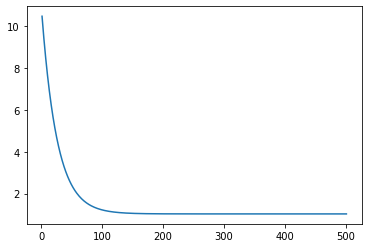

In [16]:
plt.plot([i for i in range(1,502)], J_list)

#### Final predicted best fit line

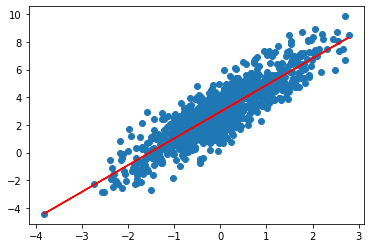

In [17]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, predicted_x1*x+predicted_x2, 'r')
plt.show()

#### Visualizing the progress with epochs

Text(0.5, 1.0, 'epoch 450')

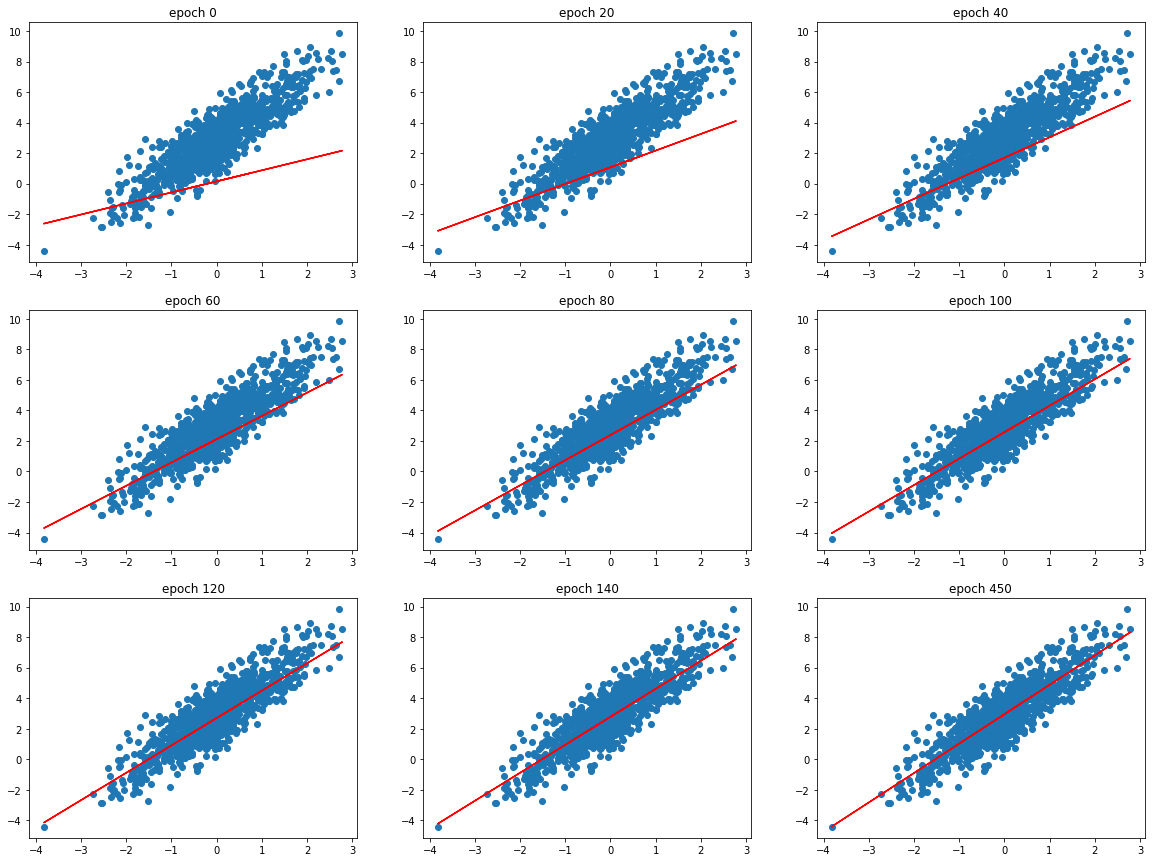

In [18]:
_, axarr = plt.subplots(3,3,figsize=(20,15))

axarr[0][0].scatter(x,y)
axarr[0][0].plot(x, line_list[0][0]*x+line_list[0][1], 'r')
axarr[0][0].set_title("epoch 0")

axarr[0][1].scatter(x,y)
axarr[0][1].plot(x, line_list[20][0]*x+line_list[20][1], 'r')
axarr[0][1].set_title("epoch 20")

axarr[0][2].scatter(x,y)
axarr[0][2].plot(x, line_list[40][0]*x+line_list[40][1], 'r')
axarr[0][2].set_title("epoch 40")

axarr[1][0].scatter(x,y)
axarr[1][0].plot(x, line_list[60][0]*x+line_list[60][1], 'r')
axarr[1][0].set_title("epoch 60")

axarr[1][1].scatter(x,y)
axarr[1][1].plot(x, line_list[80][0]*x+line_list[80][1], 'r')
axarr[1][1].set_title("epoch 80")

axarr[1][2].scatter(x,y)
axarr[1][2].plot(x, line_list[100][0]*x+line_list[100][1], 'r')
axarr[1][2].set_title("epoch 100")

axarr[2][0].scatter(x,y)
axarr[2][0].plot(x, line_list[120][0]*x+line_list[120][1], 'r')
axarr[2][0].set_title("epoch 120")

axarr[2][1].scatter(x,y)
axarr[2][1].plot(x, line_list[140][0]*x+line_list[140][1], 'r')
axarr[2][1].set_title("epoch 140")

axarr[2][2].scatter(x,y)
axarr[2][2].plot(x, line_list[450][0]*x+line_list[450][1], 'r')
axarr[2][2].set_title("epoch 450")